In [28]:
import torch

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2060'

In [3]:
from copy import deepcopy
from time import time

import torch
import torch.nn.functional as F

from torch import nn
from tensorflow.keras.datasets import fashion_mnist

from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import pandas as pd

In [4]:
class FMnistNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1024, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

In [5]:
def acc(net_output, labels):
    predicted = net_output.argmax(dim=1)
    correct = (predicted == labels).sum()
    examples = len(labels)
    return (correct / examples).item()

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train_tensor = torch.tensor(deepcopy(x_train), dtype=torch.float32)
x_train_tensor = x_train_tensor.unsqueeze(1)
x_train_tensor /= 255.

x_test_tensor = torch.tensor(deepcopy(x_test), dtype=torch.float32)
x_test_tensor = x_test_tensor.unsqueeze(1)
x_test_tensor /= 255.

y_train_tensor = torch.tensor(deepcopy(y_train), dtype=torch.long)
y_test_tensor = torch.tensor(deepcopy(y_test), dtype=torch.long)

train_set = DataLoader(TensorDataset(x_train_tensor, y_train_tensor), shuffle=False, batch_size=32)
test_set = DataLoader(TensorDataset(x_test_tensor, y_test_tensor), batch_size=len(x_test_tensor))

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
net = FMnistNet().to('cuda')

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
epochs = 100

train_loss_progress = []
test_loss_progress = []
train_acc_progress = []
test_acc_progress = []

for epoch in range(epochs):
    epoch_start = time()
    
    accum_loss = []
    accum_acc = []
    
    for data, labels in train_set:
        data, labels = data.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        net_output = net(data)
        loss = loss_fn(net_output, labels)
        loss.backward()
        optimizer.step()
        
        accum_loss.append(loss.item())
        accum_acc.append(acc(net_output, labels))
    
    epoch_duration = time() - epoch_start
        
    train_avg_loss = np.mean(accum_loss)
    train_avg_acc = np.mean(accum_acc)
    
    with torch.no_grad():
        test_data, test_labels = next(iter(test_set))
        test_data, test_labels = test_data.to('cuda'), test_labels.to('cuda')
        test_output = net(test_data)
        test_loss = loss_fn(test_output, test_labels)
        test_acc = acc(test_output, test_labels)    
        
    train_loss_progress.append(train_avg_loss)
    test_loss_progress.append(test_loss.item())
    train_acc_progress.append(train_avg_acc)
    test_acc_progress.append(test_acc)
    
    print(f"EPOCH {epoch+1}/{epochs} -- train: (loss: {train_avg_loss:.4f}, acc: {100*train_avg_acc:.2f}%), test: (loss: {test_loss:.4f}, acc: {100*test_acc:.2f}%), time: {epoch_duration:.2f}s")

EPOCH 1/100 -- train: (loss: 1.5509, acc: 91.19%), test: (loss: 1.5870, acc: 87.41%), time: 6.45s
EPOCH 2/100 -- train: (loss: 1.5505, acc: 91.21%), test: (loss: 1.5808, acc: 88.02%), time: 6.47s
EPOCH 3/100 -- train: (loss: 1.5502, acc: 91.21%), test: (loss: 1.5826, acc: 87.86%), time: 6.82s
EPOCH 4/100 -- train: (loss: 1.5495, acc: 91.33%), test: (loss: 1.5838, acc: 87.81%), time: 6.51s
EPOCH 5/100 -- train: (loss: 1.5486, acc: 91.42%), test: (loss: 1.5822, acc: 87.93%), time: 6.58s
EPOCH 6/100 -- train: (loss: 1.5482, acc: 91.45%), test: (loss: 1.5852, acc: 87.52%), time: 6.39s
EPOCH 7/100 -- train: (loss: 1.5487, acc: 91.40%), test: (loss: 1.5789, acc: 88.28%), time: 6.32s
EPOCH 8/100 -- train: (loss: 1.5478, acc: 91.49%), test: (loss: 1.5781, acc: 88.36%), time: 6.34s
EPOCH 9/100 -- train: (loss: 1.5466, acc: 91.61%), test: (loss: 1.5872, acc: 87.39%), time: 6.42s
EPOCH 10/100 -- train: (loss: 1.5474, acc: 91.51%), test: (loss: 1.5807, acc: 87.95%), time: 6.42s
EPOCH 11/100 -- tra

EPOCH 84/100 -- train: (loss: 1.5230, acc: 93.92%), test: (loss: 1.5733, acc: 88.81%), time: 6.30s
EPOCH 85/100 -- train: (loss: 1.5228, acc: 93.94%), test: (loss: 1.5716, acc: 88.89%), time: 6.29s
EPOCH 86/100 -- train: (loss: 1.5228, acc: 93.94%), test: (loss: 1.5719, acc: 88.81%), time: 6.66s
EPOCH 87/100 -- train: (loss: 1.5219, acc: 94.02%), test: (loss: 1.5693, acc: 89.21%), time: 6.26s
EPOCH 88/100 -- train: (loss: 1.5216, acc: 94.06%), test: (loss: 1.5700, acc: 89.09%), time: 6.26s
EPOCH 89/100 -- train: (loss: 1.5215, acc: 94.06%), test: (loss: 1.5713, acc: 88.95%), time: 6.28s
EPOCH 90/100 -- train: (loss: 1.5210, acc: 94.12%), test: (loss: 1.5715, acc: 88.91%), time: 6.32s
EPOCH 91/100 -- train: (loss: 1.5207, acc: 94.16%), test: (loss: 1.5696, acc: 89.15%), time: 6.29s
EPOCH 92/100 -- train: (loss: 1.5202, acc: 94.19%), test: (loss: 1.5725, acc: 88.82%), time: 6.47s
EPOCH 93/100 -- train: (loss: 1.5210, acc: 94.11%), test: (loss: 1.5723, acc: 88.74%), time: 6.28s
EPOCH 94/1

In [25]:
metadata_df = pd.DataFrame((train_loss_progress, test_loss_progress, train_acc_progress, test_acc_progress)).T
metadata_df.columns = ["train_loss", "test_loss", "train_acc", "test_acc"]
metadata_df['epoch'] = np.arange(1, epochs+1)
metadata_df = metadata_df.set_index('epoch')

<AxesSubplot:xlabel='epoch'>

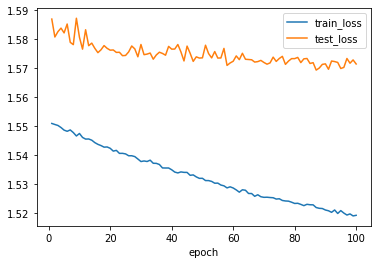

In [26]:
metadata_df[['train_loss', 'test_loss']].plot()

<AxesSubplot:xlabel='epoch'>

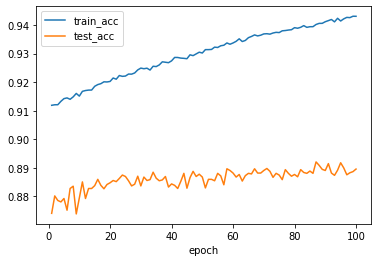

In [27]:
metadata_df[['train_acc', 'test_acc']].plot()